In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
url="https://raw.githubusercontent.com/amoreira2/Lectures/main/assets/data/GlobalFinMonthly.csv"
Data = pd.read_csv(url,na_values=-99)
Data['Date']=pd.to_datetime(Data['Date'])
Data=Data.set_index(['Date'])


# The Mean-Variance Frontier

* Below I reproduce the plot of constructed last chapter

* It shows the average **EXCESS** return and standard deviation for portfolios with different weights in the risk-free asset, the US stock market, and the international stock market


![MVfrontier](../../assets/plots/MV1.jpg)

* The upper envelope that defines the "investment frontier", i.e., what is achievable in terms of risk and expected returns

* If you are in this envelope, you know that in order to get less risk you will have to reduce your expected return

* There is no portfolio with a higher expected return and the same volatility

* And no portfolio with the same expected return and lower volatility

* In volatility-expected return space all these "investment frontier" portfolio are in a straight line

* What dow this mean?

* These portfolios achieve exactly the same ratio of expected excess return per unit of volatility since a straight line has constant slope

* So all these portfolios have exactly the same Sharpe ratio ($\frac{E[r_p-R_f]}{std(r_p-R_f)}$)

* This is also the maximum SR among all possible portfolios of the basis assets 

  *  (in this case only two: US and world portfolio)


> What do these "efficient" portfolios look like? Do they have the same weights? How do the weights in the assets vary?




## **Mathematical derivation of the Mean-variance Frontier**

* These portfolios all can be thought as minimizing variance for a given desired expected return

* or maximizing expected returns for a given aversion to variance 

* Formally they are choosing their composition of their portfolio 

$$r_p(X)=X'R+(1-\sum_i^I x_i)r_f$$

* Which is a portfolio that invests in risky assets (vector of returns R) and the rest $(1-\sum_i^I x_i)$ at the risk-free rate.

* note that I use big R here to emphasize that this is a vector of asset returns, like ($[r^{AAPL},r^{TSLA},..]$), and little $r_f$ to emphasize this is just a scalar (like 1%)

* Note that $(1-\sum_i^I x_i)<0$. what is the interpretation of this number being negative? What is the interpretation of being positive?

* So given weights X, asset returns R and rf, the portfolio returns $r_p(X)$

$$
\begin{aligned}
maximize_{X} E[r_p(X)]- \frac{\gamma}{2} Var(r_p(X))\\
\end{aligned}
$$


### **Excess return representation**

It is much easier to do the math and see what is going on if we separate the excess returns and the return piece so we represent our portfolio as

$$r_p(X)=X'R+(1-\sum_i^I x_i)r_f=X'R+r_f-(\sum_i^I x_i)r_f=X'(R-r_f)+r_f$$

$$r_p(X)=X'R^e+r_f$$

* where $R^e$  is the vector of excess returns
* It is KEY to note that all the risky assets are now zero cost portfolios
* So each risky asset is really a portfolio that is long the risky asset and short the risk-free rate
* This means that no matter the sum of the weights in X, the cost of this risky portfolio is zero
* How this this works?
* Say you have 1m dollar to invest
   - We represent your portfolio as:
   - The compositions/relative weights  $X/\sum x_i$ of your risky portfolio
   - How much of this dollar to allocate to you risky portfolio by choosing $\sum x_i$ the total fraction of your wealth invested in risky assets
* If  $\sum x_i>1$ then you are leveraging since you are investing more that 100% of your wealth in the risky assets, i.e. borrowing money to invest more than you have in the risky assets. 
* If $\sum x_i<1$ then you are invest a fraction less than 1 in the risky portfolio, thus you are leaving some money invested in the risk-free asset

You can think borrowing as shorting. They are different words for the same thing when used in the context of risk-free assets

### **Solution**


* First write our objective function in vector notation

$$E[r_p(X)]- \frac{\gamma}{2} Var(r_p(X))=E[r_f+X'R^e]- \frac{\gamma}{2} Var(r_f+X'R^e)$$

$$E[r_p(X)]- \frac{\gamma}{2} Var(r_p(X))=r_f+X'E[R^e]- \frac{\gamma}{2} X'Var(R^e)X$$

* All you need is to take the derivative of the expression with respect to the risky portfolio weights $X$ :


$$E[R^e]- 2\gamma/2 Var(R^e)X$$

* and impose the "first order condition":
$$
\begin{aligned}
E[R^e]- \gamma Var(R^e)X^*=0
\end{aligned}
$$

* which simply means that if $X^*$ is really the weight that maximizes the expression, if you move it a little bit in any direction, the value of the expression shouldn't move much


*An aside*

* What is the intution for this condition?

* It says that for a tiny move in either direction, the benefit should be zero either way

* Lets consider that we want to find the x that maximizes: $4x-x^2$  

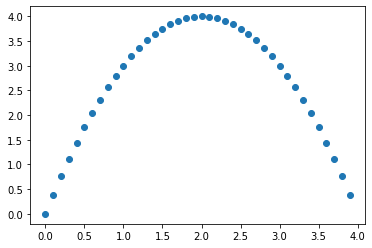

In [4]:
x=np.arange(0,4,0.1)
plt.scatter(x,4*x-x**2)

* This is maximized at 2

* The FOC for this case is simply the derivatinve of $4x-x^2$ which is

$$4-2x^*=0$$

* Which means $x^*=2$

* You see in the plot that pertubating x a little bit has no effect on the value

* close to the peak, the expression is flat.


## **The Tangecy  portfolio**



* Rewriting our first order condition we have


$
\begin{align}
\gamma Var(R^e)X^* &=E[R^e]\\
(\gamma Var(R^e))^{-1}\gamma Var(R^e)X^* &=(\gamma Var(R^e))^{-1}E[R^e]\\
X^* &=(\gamma Var(R^e))^{-1}E[R^e]\\
X^* &=\frac{1}{\gamma} Var(R^e)^{-1}E[R^e]
\end{align}$

* We simply multiplied both the RHS and the LHS by the inverse of the matrix $\gamma Var(R^e)$ that was multiplying the weight

* This is equivalent to solving 5x=4, by dividing though by 5 to get x=4/5, but in matrix form


*Questions*

* How does your distaste for risk $\gamma$ impact your portfolio composition?

* Does it impact the relative weights in the risky assets?

Note that $X^*$ is the optimal position in risky assets and therefore has the same dimension as the number of assets you are considering. 




__________________

*Aside: Three different problems with exactly the same solution*

We solved this problem

$$
\begin{aligned}
maximize_{(X)} E[X'R^e]- \gamma/2 Var(X'R^e)\\
\end{aligned}
$$

This problem has the same solution as minimizing the variance subject to hitting a desired minimum expected return target


$$
\begin{aligned}
minimize_{(X)} Var(X'R^e) \text{    subject to } E[X'R^e]\geq\mu^{Desired}\\
\end{aligned}
$$

or maximizing the expected  return subject to hitting a maximum desired volatility  target


$$
\begin{aligned}
maximize_{(X)} E(X'R^e) \text{   subject to } Var(X'R^e)\leq Var^{Desired}\\
\end{aligned}
$$

This means that once we have the tangency portfolio solution we can simply scale up and down the portfolio weights to achieve the desired volatility or expected return

_____

*Aside: Matrix inversion*

* You only need to understand how to operationaize it and in an conceptual level what it does

* But you don't need to follow all the mathematical details

* If you are interested. you can look in our linear algebra review in https://amoreira2.github.io/quantitativeinvesting/chapters/scientific/linear_algebra1.html

* I also provide a summary below

* Note that $(2)^{-1}=1/2=0.5$ (naturally!)

* $(Var(R^e))^{-1}$ is just like this 

* but more complicated because $Var(R^e)$ is a N by N matrix and we can't simply divide over to solve for X

* The definition of the inverse function is $f(x)=x^{-1}=y$ where $y*x=1$

* for matrices it is the same: $(Var(R^e))^{-1}Var(R^e)=I$, but now instead of 1, we have an identity matrix, which is a matrix with 1's in the diagonal and zero everywhere else

* For example, lets say we want to inverse a 2 by 2 matrix:

$$\left[\begin{array}{cc}3 & 7\\0 &9\end{array}\right]^{-1}=\left[\begin{array}{cc}a & b\\c &d\end{array}\right]$$


* We would simply solve


$$\left[\begin{array}{cc}3 & 7\\0 &9\end{array}\right]\left[\begin{array}{cc}a & b\\c &d\end{array}\right]=I=\left[\begin{array}{cc}1 & 0\\0 &1\end{array}\right]$$

* Which means solving this system of four equations below
$$
\begin{aligned}
3*a+7*c=1\\
3*b+7*d=0\\
0*a+9*c=0\\
0*b+9*d=1\\
\end{aligned}$$

* which in this case has an easy solution [a,b,c,d]=[1/3,-7/27,0,1/9]

* But we should be thankful for being born after the 70's, when people had to do these inversions by hand--for very large matrices

* Now we can simply us the linear algebra library build in numpy  we discussed in Notebook 1 and invert the matrix

* so we don't really to know this, but rather simpky understand conceptually what it means


In [5]:
a=np.array([[3,7],[0,9]])
print(a)
np.linalg.inv(a) 

[[3 7]
 [0 9]]


array([[ 0.33333333, -0.25925926],
       [ 0.        ,  0.11111111]])

In [6]:
np.linalg.inv(a)  @ a

array([[1.00000000e+00, 3.33066907e-16],
       [0.00000000e+00, 1.00000000e+00]])

In [7]:
a.T

array([[3, 0],
       [7, 9]])

________________________
## **Finding the Tangency portfolio**


First lets construct our vector of excess returns for our risky two assets US equity market and International equity market

In [10]:
Re=(Data[['MKT','WorldxUSA']]).subtract(Data['RF'],axis='index')
Re.head()

MKT  WorldxUSA
Date                         
1963-02-28 -0.0238  -0.005073
1963-03-31  0.0308  -0.001929
1963-04-30  0.0451  -0.005836
1963-05-31  0.0176  -0.002586
1963-06-30 -0.0200  -0.013460

We start by estimating the covariance matrix from our data $Var(R^e)$

In [11]:
Re.cov()

MKT  WorldxUSA
MKT        0.001948   0.001264
WorldxUSA  0.001264   0.002182

We then estiamte the expected excess return, the premium you expect to earn by investing in each asset $E[R^e]$

In [12]:
Re.mean()

MKT          0.005140
WorldxUSA    0.004149
dtype: float64

We then invert the covaraicne matrix $Var(R^e)^{-1}$

In [16]:
np.linalg.inv(Re.cov()) 

array([[ 822.50792137, -476.49212708],
       [-476.49212708,  734.40580739]])

we then use the dot product to cross-mulitply our vector of expected excess returns by the inverse of the covariance matrix

$$Var(R^e)^{-1}E[R^e]$$

In [17]:
W=np.linalg.inv(Re.cov()) @ Re.mean()
W

array([2.25099751, 0.597729  ])

Now for a given level of risk-aversion $gamma$ we can find the optimal risky portfolio 

In [21]:
gamma=4

Wstar=W/gamma
Wstar

array([0.56274938, 0.14943225])

and the amount allocated to the risk-free asset

In [22]:
1-np.sum(Wstar)

0.2878183714834085

## **Two-fund separation**

* It tells us that the decision of which assets to invest is completely independent of your risk-aversion

* Your risky portfolio is always the same, and you risk-aversion simply determines how much of it you will have, versus the risk-free rate

* Please take a moment to appreciate this 

* Why that happens?

Because any portfolio that is proportional to $Var(R^e)^{-1}E[R^e]$ achieve the highest feasible Sharpe Ratio

* Why is that?

Recall what a SR is : $E[r-r_f]/\sigma(r-r_f)$. Since this portfolio solves the problem of maximizing expected return for a given level of volatility, it also is the portfolio with maximum Sharpe Ratio

Note further that any linear combination of this portfolio with the risk-free rate will achieve exactly the same sharpe ratio. 

Let $r_p=r_f+wr^*$ then $E[r_p-r_f]/\sigma(r_p)=E[wr^*]/\sigma(wr^*+r_f)=E[r^*]/\sigma(r^*)$




## **Properties of the Tangency Portfolio**

Any portfolio that is proportional to  $Var(R^e)^{-1}E[R^e]$ is in the **Tangency** of the mean-variance frontier

I will refer to $X_T=Var(R^e)^{-1}E[R^e]$ as the tangency portfolio, but formally any other portfolio that is of the form $y X_T$ where y is a scalar is also tangency.

1. What is the expected excess return of the tangency portfolio?

$$E[yX_T'R^e]=yE[E[R^e]'Var(R^e)^{-1}R^e]=yE[R^e]'Var(R^e)^{-1}E[R^e]$$

2. What is the volatility of the tangency portfolio?

$$Var[yX_T'R^e]=y^2Var(E[R^e]'Var(R^e)^{-1}R^e)=y^2E[R^e]'Var(R^e)^{-1}Var(R^e)Var(R^e)^{-1}E[R^e]$$

$$Var[yX_T'R^e]=y^2E[R^e]'Var(R^e)^{-1}E[R^e]$$

$$STD[yX_T'R^e]=y\sqrt{E[R^e]'Var(R^e)^{-1}E[R^e]}$$

3. What is the Sharpe Ratio of the Tangency portfolio?

$$\frac{E[yW_T'R^e]}{STD[yW_T'R^e+r_f]}=\sqrt{E[R^e]'Var(R^e)^{-1}E[R^e]}$$

As we saw before, the Sharpe Ratio is invariant to the precise location that you choose in the investment frontier. 

Volatility and Expected excess return will vary, but any leverage effect will exactly cancel out when you look at the Sharpe Ratio

So Sharpe Ratio is nice because it is invariant to leverage

**Portfolio advice summary (so far!)**

* All investors invest in the same portfolio of risky assets, regardless of risk aversion.

* Depending on risk aversion (desired level of volatility) , they choose an appropriate mix of risk-free and risky fund investments

__________________
*Reality is a bit more complicated*

- Here we assume your preferences: You like higher portfolio expected returns and dislikes portfolio variance

- Peoples preferences for risk are likely to be much richer than these simple preferences

- We will discuss later how to incorporate other risk dimensions (tail risks, background risks, etc)

- We also ignore investment horizon effects which we will discuss later in the course
